# Project robot

Please fill in the names of the team mebers.

<div class="alert alert-block alert-danger">

<b>Team: 06</b>
- Tim Jauch 763086 
- Annabelle Heberle 770677
- Felix Hoffmann 770014

<b>Result:</b>
    
| Task   |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  Sum  |
|--------|-----|-----|-----|-----|-----|-----|-----|-----|-------|
| Points | ?/1 | ?/1 | ?/1 | ?/2 | ?/5 | ?/2 | ?/4 | ?/4 | ??/20 |  
    
</div>

## Packages

<div class="alert alert-block alert-danger">
    
<b>Important: Do not import other packages or libraries!</b>
    
</div>

### Python

In [1]:
from platform import python_version
print('python version = '+ python_version())

python version = 3.11.8


### Display images and videos

In [2]:
from IPython.display import HTML, Image, IFrame, YouTubeVideo

### NumPy

In [3]:
import numpy as np
print('numpy version = '+ np.__version__)

numpy version = 1.26.1


### Matplotlib

In [4]:

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
print('matplotlib version = '+ matplotlib.__version__)

matplotlib version = 3.8.1


### Google Colab
If you are using Google Colab mount drive and change directory.

In [5]:
if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd '/content/gdrive/MyDrive/Colab Notebooks/Modelling and Simulation/robot'
else:
    print('Not running on Google Colab')

Not running on Google Colab


## 1 Modelling
Robots have been used in industrial manufacturing processes for almost 50 years in different areas of application.
An industrial robot is a machine for processing or assembling workpieces that is controlled by computer programs.
Industrial robots are distinguished by the structure of the robot arms, the so-called kinematics.
Robotic arms consist of rigid links that are connected to each other by swivel joints or sliding joints.
The most common robotic arms are 6-axis robots.
They are comparable to the human arm and therefore offer many application possibilities.
Robots have established themselves as an important part of production, particularly in the automotive industry.

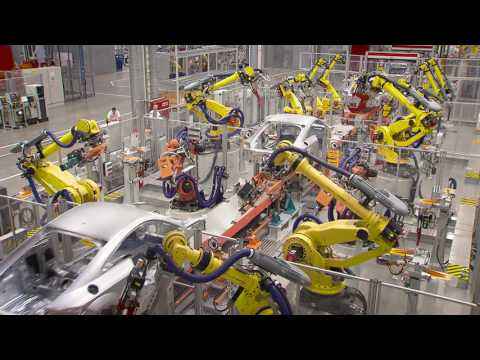

In [6]:
YouTubeVideo('rbki4HR41-4')

In this project we consider a very simplified model, in which the robot consists of two arms that move in one plane.
Swivel joints allow the rotation of the arms.
The arms have a fixed length.
At the end of the second arm, an object hangs vertically downwards, attached to a freely suspended rope.

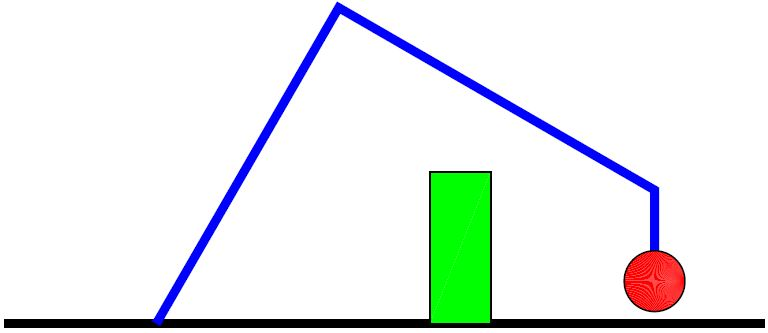

In [7]:
Image('robot_figure1.jpg', width=300, height=150)

By appropriately controlling the two angles on the swivel joints, the gripper can be used to move the object over an obstacle.
The goal is to simulate and visualize different motion sequences for lifting an object over an obstacle.

## 2 Numerical treatment
In order to describe the model with mathematical formulas, we need a detailed technical drawing.

### 2.1 Technical drawing
We do not need a 3D sketch, a 2D sketch is sufficient.
At point $O$ the robot is fixed at the baseline.
The origin of the coordinate system will be placed at this point
with the $x$-axis pointing to the right and the $y$-axis pointing up.
We consider an obstacle in the form of a rectangle with height $h$ and width $w$.
The distance between the obstacle and the origin is denoted by $d$.
The object to be transported over the obstacle is described by a circle with midpoint $M$ and radius $r$.
The positions of the points $P$, $Q$, $R$, $M$ and $T$ depend on the angles $\alpha$ and $\beta$.
$T$ is the point of the object closest to the baseline.

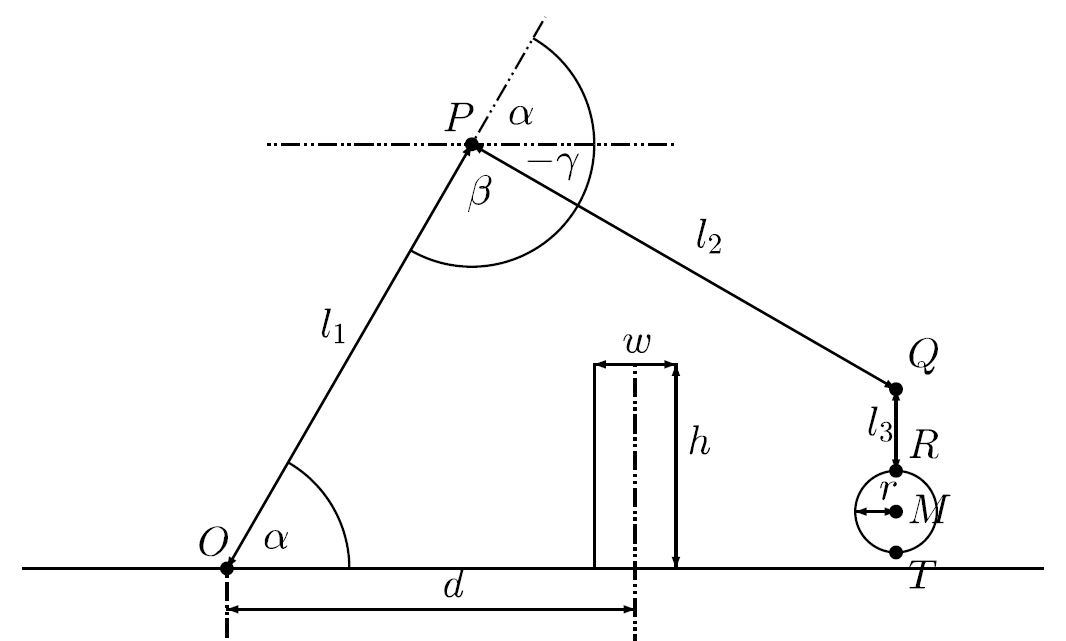

In [8]:
Image('robot_figure2.jpg', width=600, height=300)

### 2.2 Direct kinematics
The positions of the points $P$, $Q$, $R$, $M$ and $T$ is clearly defined by the two joint angles.
This type of control by the angles $\alpha$ and $\beta$ is called direct kinematics.
Our objective is to derive formulars for the positions of the points $P$, $Q$, $R$, $M$ and $T$ as a function of $\alpha$ and $\beta$.
The parameters $l_1$, $l_2$, $l_3$ and $r$ are also included in these formulas.

The position of point $P$ with respect to the position of point $O$ can be calculated using the length $l_1$ and the angle $\alpha$:

$$
P = O +
l_1 \, 
\left(
\begin{array}{c}
\cos{(\alpha)} \\
\sin{(\alpha)} \\
\end{array}
\right)
$$

In order to calculate the position of point $Q$ we use the angle $\gamma$ as shown in the figure above:

$$
\alpha + \beta - \gamma = \pi
\quad \Longrightarrow \quad
\gamma = \alpha + \beta - \pi
$$

The position of point $Q$ with respect to the position of point $Q$ can be calculated using the length $l_2$ and the angle $\gamma$:

$$
Q
= P
+ l_2 \, 
\left(
\begin{array}{c}
\cos{(\gamma)}\\
\sin{(\gamma)}\\
\end{array}
\right)
$$

By a straightforward calculation we get the positions of the points $R$, $M$ and $T$:  

$$
R = Q
+ l_3 \, 
\left(
\begin{array}{r}
 0\\
-1\\
\end{array}
\right),
\quad
M = R
+ r \, 
\left(
\begin{array}{r}
 0\\
-1\\
\end{array}
\right),
\quad
T = M
+ r \, 
\left(
\begin{array}{r}
 0\\
-1\\
\end{array}
\right)
$$

### 2.3 Inverse kinematics
Inverse kinematics is exactly the opposite of direct kinematics.
This means that the position of the point $T(T_x \mid T_y)$ is given and the angles $\alpha$ and $\beta$ are calculated.
If we put together all the formulas of direct kinematics, we get:

$$
    \begin{array}{lcl}
        T_x & = & l_1 \, \cos(\alpha) - l_2 \, \cos(\alpha + \beta)\\
		T_y & = & l_1 \, \sin(\alpha) - l_2 \, \sin(\alpha + \beta) - l_3 - 2 \, r
	\end{array}
$$

Now we have to solve these equations according to $\alpha$ and $\beta$.
We could do that through tricky symbolic calculations.
But we choose another alternative.
We solve the equations using a numerical approximation method.
The standard procedure for this purpose is Newton's method for finding roots.
To this end, we must reformulate the equations.
The problem now is:
Find the common roots $\alpha$ and $\beta$ for the functions $f_1$ and $f_2$:

$$
	\mathbf{f}(\alpha,\beta) = 
	\left(
	\begin{array}{l}
		f_1(\alpha,\beta)\\
		f_2(\alpha,\beta)
	\end{array}
	\right)
	=
	\left(
	\begin{array}{l}
		T_x - l_1 \, \cos(\alpha) + l_2 \, \cos(\alpha + \beta) \\
		T_y - l_1 \, \sin(\alpha) + l_2 \, \sin(\alpha + \beta) + l_3 + 2 \, r
	\end{array}
	\right).
$$


<div class="alert alert-block alert-info">
    
### Task 1: Formula for Jacobian matrix <font color=red>(2 points)</font>

Derive a formula for the Jacobian matrix $\mathbf{J}$ of the function $\mathbf{f}$.
Calculate numerical values of the Jacobian matrix $\mathbf{J}$ for
$\alpha = \frac{\pi}{3}$ and $\beta = \frac{\pi}{2}$
by hand.

</div>

<div class="alert alert-block alert-success">

<b>Solution of Task 1</b>

Formula for Jacobian matrix

$$
    \boldsymbol{J} , (\alpha,\beta) = 
    \left(
        \begin{array}{ll}
            l1sin(\alpha)-l2sin(\alpha+\beta) & -l2sin(\alpha+\beta) \\
            -l1cos(\alpha)+l2cos(\alpha+\beta) & l2cos(\alpha+\beta) \\
        \end{array}
    \right)
$$

Numerical values of the Jacobian matrix $J$ for $\alpha = \frac{\pi}{3}$ and $\beta = \frac{\pi}{2}$

$$
    \boldsymbol{J} , (1.04719755,1.57079633) \approx
    \left(
        \begin{array}{rr}
            0.886l1-0.5l2 & -0.5l2 \\
            -0.5l1-0.866l2 & -0.866l2 \\
        \end{array}
    \right)
$$  
</div>

### 2.4 Path planing
The movement of the object should take place along a predetermined trajectory for the positions of point $T$.

The simplest trajectory consists of a rectangular movement.
The object is first lifted vertically from the floor until the height of the obstacle is reached.
Then the object is moved horizontally over the obstacle.
Finally, the object is placed vertically down on the floor.

Other alternatives are trajectory curves in the form of semicircles or parabolas.

### 2.5 Collision detection
One of the most important tasks when simulating robots is to make sure that there are no collisions.
Collisions can occur in different forms.
The object could collide with the obstacle, with an arm, or with the ground.

Functions that intersect straight lines with straight lines or with circles form the mathematical basis of collision checks.

We take a closer look at the calculation of the intersection of a straight line with a circle.
We represent a straight line with the constants $a$, $b$ and $c$ with the equation

$$
a \, x + b \, y = c
$$

and a circle with midpoint $M(x_0 \mid y_0)$ and radius $r$ with the equation

$$
(x - x_0)^2 + (y - y_0)^2 = r^2
$$

We use the transformation

$$
\tilde{x} = x - x_0, \quad \tilde{y} = y - y_0 
$$

to simplify the equation of the circle to

$$
\tilde{x}^2 + \tilde{y}^2 = r^2
$$

With this transformation the equation for the straight line is given by

$$
	a (\tilde{x} + x_0) + b (\tilde{y} + y_0) = c
    \quad \Longrightarrow \quad
    a \, \tilde{x} + b \, \tilde{y} = 
    \underbrace{c - a \, x_0 - b \, y_0}_{\displaystyle d} 
$$

In order to simplify the notation we use the shortcut

$$
d = c - a \, x_0 - b \, y_0
$$

In case of $b \neq 0$ we can solve this equation for $\tilde{y}$

$$
\tilde{y} = \frac{d - a \tilde{x}}{b}
$$

Inserting this in the equation for the circle results in the quadratic equation

$$
\tilde{x}^2 + \left( \frac{d - a \tilde{x}}{b}\right)^2 = r^2
$$

This can be written as

$$
\underbrace{\left(1 + \frac{a^2}{b^2} \right)}_{\displaystyle A} \, \tilde{x}^2 \, + \,
\underbrace{\frac{-2 \, a \, d}{b^2}}_{\displaystyle B} \, \tilde{x} \, + \, 
\underbrace{\frac{d^2}{b^2} - r^2}_{\displaystyle C} = 0
$$

After multiplication with $b^2$ this results in

$$
\underbrace{\left(a^2 + b^2 \right)}_{\displaystyle A} \, \tilde{x}^2 \, - \,
\underbrace{2 \, a \, d}_{\displaystyle -B} \, \tilde{x} \, + \, 
\underbrace{d^2 - r^2 \, b^2}_{\displaystyle C} = 0
$$

With the shortcuts

$$
A = a^2 + b^2, \quad
B = -2 \, a \, d, \quad 
C = d^2 - r^2 \, b^2
$$

the problem ends up in a quadratic equation for $\tilde{x}$

$$
A \, \tilde{x}^2 + B \, \tilde{x} + C = 0
$$

As expected, the intersection problem of a stright line with a circle can either have two solutions, one solution, or no solution at all.

In case of $b = 0$ we can proceed similarly.
Since in this case we can guarantee $a \neq 0$.

## 3 Implementation
We initialize all variables that describe the robot and the obstacle with plausible values.
During the complete simulation we should always keep in mind that everything should also work with different values.

In [9]:
def robotValues():
    
    # obstacle
    h = 2.5 # height of the obstacle  
    w = 1.0 # width of the obstacle 
    d = 5.0 # distance to the origin of the obstacle 

    # robot arms
    l1 = 6.0 # length of the first arm
    l2 = 6.0 # length of the second arm
    l3 = 1.0 # length of the third arm

    # object
    r = 0.5 # radius of the object
    
    return h, w, d, l1, l2, l3, r

### 3.1 Direct kinematics
In the last chapter we derived the formulas for direct kinematics.
The input for the function `robotDirectKinematics()` are the angles $\alpha$ and $\beta$.

<div class="alert alert-block alert-info">
    
### Task 2: Direct kinematics <font color=red>(2 points)</font>

Implement the function `robotDirectKinematics()` and test it with 
$\alpha = \frac{\pi}{3}$ and $\beta = \frac{\pi}{2}$.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 2</b>

Implementation of function `robotDirectKinematics()`:
</div>

In [10]:
# Solution of Task 2
def robotDirectKinematics(alpha,beta):
    
        h, w, d, l1, l2, l3, r = robotValues()

        gamma = alpha+beta-np.pi

        P_x = l1*np.cos(alpha)
        P_y = l1*np.sin(alpha)
        P = np.array([P_x,P_y])

        Q_x = P_x + l2*np.cos(gamma)
        Q_y = P_y + l2*np.sin(gamma)
        Q = np.array([Q_x,Q_y])

        R_x = Q_x + l3*0
        R_y = Q_y + l3*-1
        R = np.array([R_x,R_y])

        M_x = R_x + r*0
        M_y = R_y + r*-1
        M = np.array([M_x,M_y])

        T_x = M_x + r*0
        T_y = M_y+ r*-1
        T = np.array([T_x,T_y])

    
        return P, Q, R, M, T

<div class="alert alert-block alert-success">

<b>Solution of Task 2</b>
    
Test of function `robotDirectKinematics()` with
$\alpha = \frac{\pi}{3}$ and $\beta = \frac{\pi}{2}$:
</div>

In [11]:
# Solution of Task 2
alpha = np.pi / 3
beta = np.pi / 2

robotDirectKinematics(alpha, beta)



(array([3.        , 5.19615242]),
 array([8.19615242, 2.19615242]),
 array([8.19615242, 1.19615242]),
 array([8.19615242, 0.69615242]),
 array([8.19615242, 0.19615242]))

### 3.2 Inverse kinematics
We use Newton's method for finding roots to calculate the angles $\alpha$ and $\beta$ according to a given position $T$.
Therefore we use the functions $f_1$ and $f_2$ as described it in the last chapter.

In the final simulation we use a sequence of positions that are close together along a path.
The angles of the last position can be used as starting values to calculate the angles for the current position.
Thus in the function `robotInverseKinematics()` we use the angles $\alpha$ and $\beta$ both as input and output.

The iteration is stopped as soon as a sufficient accuracy is reached.

<div class="alert alert-block alert-info">
    
### Task 3: Inverse kinematics <font color=red>(4 points)</font>

Implement the function `robotInverseKinematics()`.
Test the function with the point $T$ located on top in the middle of the obstacle.
Which angels $\alpha$ and $\beta$ correspond to the point $T$?
How many iteration steps does the Newton-Iteration need to calculate the angles?
</div>

<div class="alert alert-block alert-success">

<b>Solution of task 3</b>

Implementation of function `robotInverseKinematics()`:
</div>

In [12]:
# Solution of Task 3
def robotInverseKinematics(T,alpha=np.pi/2.0,beta=np.pi/2.0):

    h, w, d, l1, l2, l3, r = robotValues()

    #Winkel für verünftigen start gegeben !!!!!!!! Sonst muss von 0 - 360 durchprobiert werden 
    # Put here the code for the Newton-iteration with initial values alpha und beta
    #

    counter = 0
    #Winkel= np.array([alpha,beta])
    while True:
    
        
        counter+=1
        UrsprungsFunktion = np.array([T[0] - l1 * np.cos(alpha)+l2*np.cos(alpha + beta), T[1] - l1 * np.sin(alpha)+l2*np.sin(alpha + beta)+l3+2*r])
        JacobyMatrix = np.array([[l1*np.sin(alpha)-l2*np.sin(alpha + beta),-l2*np.sin(alpha + beta)],[-l1*np.cos(alpha)+l2*np.cos(alpha + beta),l2*np.cos(alpha + beta)]])
        
        #Lösung aus Newtonverfahren 
        
        #UrsprungsFunktion = np.array([T[0] - l1 * np.cos(Winkel[0])+l2*np.cos(Winkel[0] + Winkel[1]), T[1] - l1 * np.sin(Winkel[0])+l2*np.sin(Winkel[0] + Winkel[1])+l3+2*r])
        #JacobyMatrix = np.array([[l1*np.sin(Winkel[0])-l2*np.sin(Winkel[0] + Winkel[1]),-l2*np.sin(Winkel[0] + Winkel[1])],[-l1*np.cos(Winkel[0])+l2*np.cos(Winkel[0] + Winkel[1]),l2*np.cos(Winkel[0] + Winkel[1])]])
        
        UrspJac= np.linalg.solve(JacobyMatrix,-UrsprungsFunktion) 
        #print(UrspJac)
        #Aufteilen in zwei Variablen 
        deltaUrsp , deltaJaco = UrspJac
        
        #Winkel = Winkel + UrspJac
        #print(Winkel)
        #Delta berechnen
        alpha = alpha + deltaUrsp
        beta = beta + deltaJaco

        print('alpha = ',alpha ,'beta = ',beta)
        
        #np.finfo(float).eps <- fragt maschienengenauigkeit ab ab gewissen wert wird sie unterschritten dann kommt abbruch
        #max(abs(UrspJac)) <- vergleicht alle werte in matrix mit rechengenauigkeit 
        if max(abs(UrspJac)) < np.finfo(float).eps*100:
            print('Iterations: ',counter)
            break
        if (counter > 10):
            print('Iterations: ',10)
            break
    #alpha, Beta = Winkel
    return alpha, beta
    

<div class="alert alert-block alert-success">

<b>Solution of Task 3</b>
    
Testing of function `robotInverseKinematics()`:
</div>

In [13]:
# Solution of Task 3
h, w, d, l1, l2, l3, r = robotValues()


Test = np.array([d,h])  #Testpunkt
robotInverseKinematics(Test)



alpha =  1.7374629934615633 beta =  1.15412966012823
alpha =  1.7083867030026336 beta =  1.1898495681186867
alpha =  1.7085403898548872 beta =  1.1901422071785213
alpha =  1.7085402872971394 beta =  1.1901422825685204
alpha =  1.7085402872971411 beta =  1.1901422825685244
Iterations:  5


(1.7085402872971411, 1.1901422825685244)

<div class="alert alert-block alert-info">
    
### Task 4: Testing kinematics functions <font color=red>(2 points)</font>
Use the function `robotDirectKinematics()` to test the function `robotInverseKinematics()`.
What problems can occur with the function `robotInverseKinematics()`?   

</div>

<div class="alert alert-block alert-success">

<b>Solution of Task 4</b>
    
Testing of function `robotInverseKinematics()` with the function `robotDirectKinematics()`:
</div>

In [14]:
# Solution of Task 4

alpha, beta = robotInverseKinematics(Test)
P, Q, R, M, T = robotDirectKinematics(alpha, beta)




alpha =  1.7374629934615633 beta =  1.15412966012823
alpha =  1.7083867030026336 beta =  1.1898495681186867
alpha =  1.7085403898548872 beta =  1.1901422071785213
alpha =  1.7085402872971394 beta =  1.1901422825685204
alpha =  1.7085402872971411 beta =  1.1901422825685244
Iterations:  5


<div class="alert alert-block alert-success">

<b>Solution of Task 4</b>
    
Problems of the function `robotInverseKinematics()`:
    
(1) Iteration does not converge to a solution.
    
(2) Jacobian matrix is singular.
</div>

In [15]:
# Solution of Task 4


#Iteration does not converge check 
alpha = 9
beta = 9

robotInverseKinematics(T,alpha,beta)
print("Results divergate, they swing around Values cant find a destination")
#Singularity check calculate determine 

alpha = 0
beta = 0
robotInverseKinematics(T,alpha,beta)










alpha =  13.605844722614567 beta =  -1.3355479529984162
alpha =  12.222580141364071 beta =  -0.2627507795875228
alpha =  11.10034834424192 beta =  -1.05573955235728
alpha =  11.797344636209742 beta =  -0.41274035594015557
alpha =  12.53005912592509 beta =  -1.1286817629497161
alpha =  12.295481184659309 beta =  -1.1523417045274076
alpha =  12.323578160040071 beta =  -1.1898528462559925
alpha =  12.323460444157023 beta =  -1.190142221809194
alpha =  12.323460530635048 beta =  -1.1901422825685213
alpha =  12.323460530635046 beta =  -1.1901422825685246
Iterations:  10
Results divergate, they swing around Values cant find a destination


LinAlgError: Singular matrix

### 3.3 Path planing
We implement a rectangular movement for path planing.
The motion will start at position $(x_0 \mid 0)$ and end at position $(x_1 \mid 0)$.
The height ist specified by $y$ which should be greater than the height $h$ of the obstacle. 
The function will generate a sequenze of $n$ points.

<div class="alert alert-block alert-warning">
    
<b>Example</b>    

For example $x_0=3$, $x_1=7$, $y=6$ and $n=13$ will generate the following path: 

$$
\left(
    \begin{array}{lllllllllllll}
        3. & 3. & 3. & 3. & 3. & 4. & 5. & 6. & 7. & 7. & 7. & 7. & 7. \\
        0. & 1.5 & 3. & 4.5 & 6. & 6. & 6. & 6. & 6. & 4.5 & 3. & 1.5 & 0.
     \end{array}
\right)
$$

</div>

<div class="alert alert-block alert-info">
    
### Task 5: Path planing <font color=red>(2 points)</font>

Implement the function `robotPath()` so that a sequenze of exactly $n$ points will be generated.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 5</b>

Implementation of function `robotPath()`:
</div>

In [16]:
# Solution of Task 5
def robotPath(x0,x1,y,n):
    
    #
    # replace this with your code!
    #
    #path = np.array([[x0, x0, x1, x1],[0.0, y, y, 0.0]])
    
    #path initializing-----------------
    rows = n
    columns = n
    path = np.empty((rows, columns)) 
    
    path_x = np.zeros(n)
    path_y = np.zeros(n)
    
    rest = n%3
    move = (n-(n%3))/3
    
    #print(move)
    
    #-----------------------------------
    #Aufteilung mit modulo 
    if (rest == 0):
        move_y=n/3
        move_x =n/3
    
    if (rest == 1):
        #use move_y double up and down 
        move_y = rest+move
        move_x = (n-(move_y*2))
        
    if (rest == 2):
        #divided cause equality looks better
        move_y = (rest/2)+move
        move_x = (n-(move_y*2))
        
        
    print(move_x,move_y)
    
    #distance points-----------------
    steps_y = y/(move_y-1)
    steps_x = (x1-x0)/(move_x+1)
    print(steps_y)
    print(steps_x)
    
    i=0
    y0=0
    #move up-----------------------------
    for i in range (int(move_y)):
        path_x[i] = x0
        path_y[i] = y0
        y0= y0+steps_y
        if(i == move_y-1):
            y0= y0-steps_y
            
            
    #side movement x-direction------------------------
    #xx damit nicht in x0 rumgepfuscht wird 
    #j weil der startpunkt verschoben ist und die for-loop es nicht verstanden hat
    xx=x0
    j=int(move_y)
    for i in range (int(move_x)):   
        xx= xx+steps_x
        path_x[j] = xx
        path_y[j] = y0
        j+=1
       
    #down-------------------------
    j=int(move_x+move_y)
    for i in range (int(n-(move_x+move_y))):  
        path_x[j] = x1
        path_y[j] = y0
        y0= y0-steps_y
        j+=1
        
    #----------------------------------------------
    
    print(path_x)
    print(path_y)
    path[0]=path_x
    path[1]=path_y
    
    
    
    return path

Print and plot the path with $x_0=3$, $x_1=7$, $y=6$ and $n=13$:

3.0 5.0
0.875
1.0
[3. 3. 3. 3. 3. 4. 5. 6. 7. 7. 7. 7. 7.]
[0.    0.875 1.75  2.625 3.5   3.5   3.5   3.5   3.5   2.625 1.75  0.875
 0.   ]


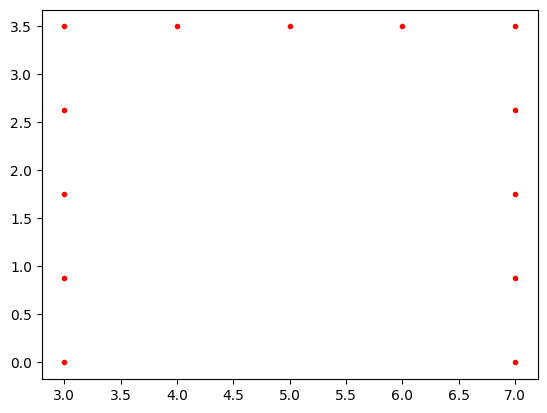

In [17]:
path = robotPath(3.0,7.0,3.5,13)
#print(path)
fig1, ax1 = plt.subplots()
ax1.plot(path[0,:],path[1,:],'.r')

### 3.4 Collision detection
We will implement a function to calculate the intersection points of a straight line with a circle, as described in the last chapter. 

<div class="alert alert-block alert-info">
    
### Task 6: Intersect line circle <font color=red>(4 points)</font>

Implement the function `intersectLineCircle()`.
Do not forget to also consider the special cases of vertical and horizontal straight lines.
</div>

<div class="alert alert-block alert-success">

<b>Solution of task 6</b>

Implementation of function `intersectLineCircle()`:
</div>

In [18]:
# Solution of Task 6
def intersectLineCircle(a,b,c,M,r):
    # line:   a*x + b*y = c
    # circle: (x - M[0])^2 + (y - M[1])^2 = r^2
    S = np.array([[],[]])
    # Extract x0 and y0 from the midpoint M
    x0, y0 = M

    # Calculate the discriminant
    discriminant = c - a*x0 - b*y0

    if a == 0 and b == 0:
        # Invalid values
        print('Invalid values => a = 0 and b = 0')
        return S
    
    if a == 0:
        # Horizontal line
        y_tilde = discriminant/b
        # two touching points
        if np.abs(y_tilde) < r:
            x_tilde1 = np.sqrt(r**2 - y_tilde**2)
            x_tilde2 = -x_tilde1
            S = np.array([[x_tilde1, x_tilde2], [y_tilde, y_tilde]])
        # one touching point
        elif np.abs(y_tilde) == r:
            S = np.array([[0], [y_tilde]])
        # Touching points (Display)
        return S + np.array([M]).T

    if b == 0:
        # Vertical line
        x_tilde = discriminant/a
        # two touching points
        if np.abs(x_tilde) < r:
            y_tilde1 = np.sqrt(r**2 - x_tilde**2)
            y_tilde2 = -y_tilde1
            S = np.array([[x_tilde, x_tilde], [y_tilde1, y_tilde2]])
        # one touching point
        elif np.abs(x_tilde) == r:
            S = np.array([[x_tilde], [0]])
        # Touching points (Display)
        return S + np.array([M]).T


    # Calculate quadratic equation for x tilde
    A = a**2 + b**2
    B = -2*a*discriminant
    C = discriminant**2 - r**2 * b**2

    # calculate the Discriminant
    Discriminant = B**2 - 4 * A * C
    # round Discriminant
    Discriminant = np.round(Discriminant, 10)

    if Discriminant < 0:
        # no touching point
        return S
    elif Discriminant == 0:
        # one touching point
        x_tilde = -B/(2*A)
        y_tilde = (discriminant - a*x_tilde)/b
        S = np.array([[x_tilde],[y_tilde]])
    else:
        # two touching points
        x_tilde1 = (-B + np.sqrt(Discriminant))/(2*A)
        x_tilde2 = (-B - np.sqrt(Discriminant))/(2*A)
        y_tilde1 = (discriminant - a*x_tilde1)/b
        y_tilde2 = (discriminant - a*x_tilde2)/b
        S = np.array([[x_tilde1,x_tilde2],[y_tilde1,y_tilde2]])

    # Touching points (Display) 
    return S + np.array([M]).T

     

Test of function `intersectLineCircle()`:

In [19]:
def intersectLineCircleTest(a,b,c,M,r):
    # line:   a*x + b*y = c
    # circle: (x - M[0])^2 + (y - M[1])^2 = r^2

    # intersect line with circle
    S = intersectLineCircle(a,b,c,M,r)

    # plot intersection points
    fig, ax = plt.subplots(1)
    if len(S) > 0:
        ax.plot(S[0,:],S[1,:],'*r')
    else:
        print('No intersection point!')

    # plot circle
    t = np.linspace(0,2*np.pi,100)
    ax.plot(M[0]+r*np.cos(t),M[1]+r*np.sin(t),'-b')
    ax.set_aspect(1.0)

    # plot straight line
    x_min, x_max = M[0] - 2.0*r, M[0] + 1.5*r
    y_min, y_max = M[1] - 2.0*r, M[1] + 1.5*r
    if abs(a) > np.finfo(float).eps:
        y = np.array([y_min,y_max])
        x = (c-b*y)/a
        ax.plot(x,y,'-k')
    elif abs(b) > np.finfo(float).eps:
        x = np.array([x_min,x_max])
        y = (c-a*x)/b
        ax.plot(x,y,'-k')
    else:
        print('Error!')

    # set limits and grid lines
    ax.axis([x_min,x_max,y_min,y_max])
    ax.set_aspect('equal')
    ax.grid(True)

    return

Invalid values => a = 0 and b = 0
Error!


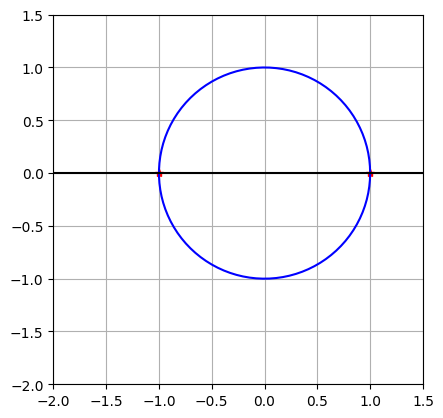

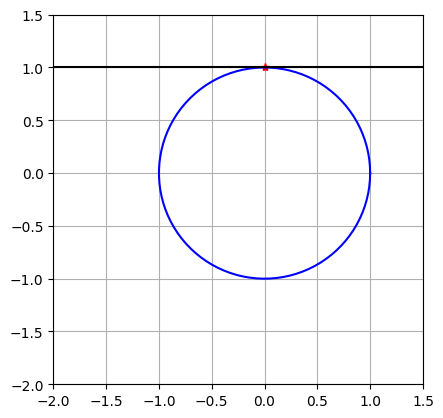

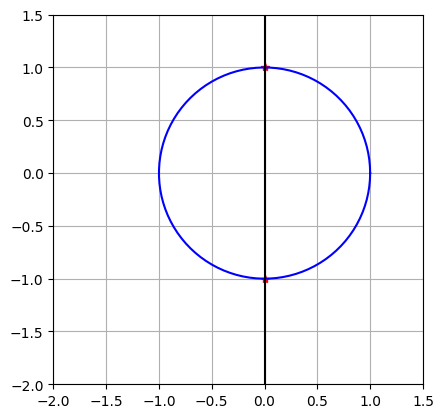

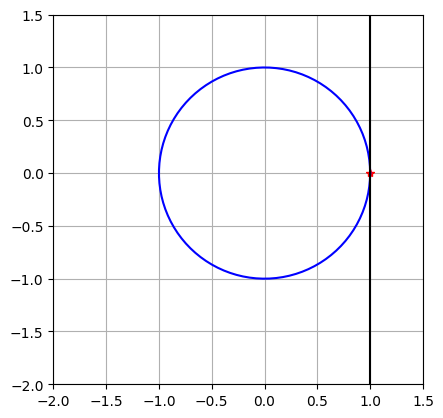

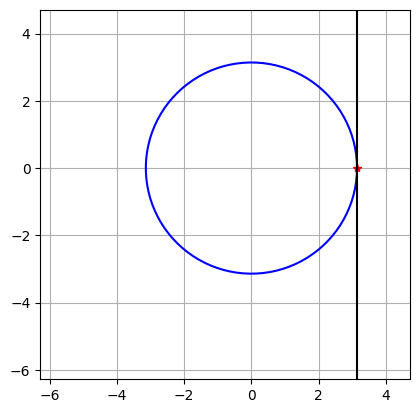

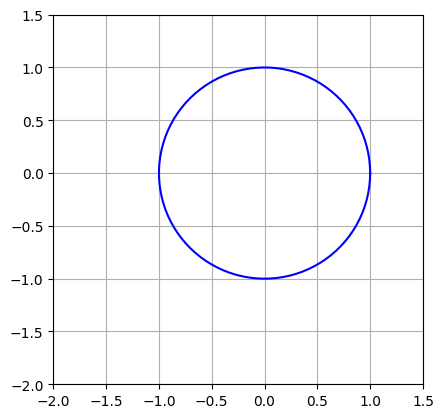

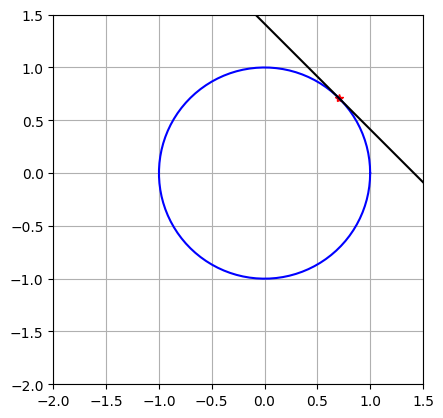

In [20]:
intersectLineCircleTest(0.0,1.0,0.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(0.0,1.0,1.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(1.0,0.0,0.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(1.0,0.0,1.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(1.0,0.0,np.pi,np.array([0.0,0.0]),np.pi)
intersectLineCircleTest(0.0,0.0,0.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(1.0,1.0,np.sqrt(2),np.array([0.0,0.0]),1)

## 4 Visualization
In order to visualize the simulation, we implement a function that draws the robot.
The postions of the arms and the object depends on the angles $\alpha$ and $\beta$.
Therefore the function `robotDraw()` gets $\alpha$ and $\beta$ as input arguments. 

In [21]:
def robotDraw(alpha,beta):

    ax = fig.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')
    ax.set_xlim(-l1,l1+l2)
    ax.set_ylim(-1.0,l1+l2)
   
    # baseline
    baseline_x = d*np.array([-0.5,2.0])
    baseline_y =np.array([0.0,0.0])
    ax.plot(baseline_x,baseline_y,'-k')

    # obstacle
    obstacle_x = d+w/2*np.array([-1.0,1.0,1.0,-1.0,-1.0])
    obstacle_y = h*np.array([0.0,0.0,1.0,1.0,0.0])
    ax.fill_between(obstacle_x,obstacle_y,facecolor=[0.0,1.0,0.0])
    ax.plot(obstacle_x,obstacle_y,'-k')

    # robot
    P, Q, R, M, T = robotDirectKinematics(alpha,beta)
    ax.plot(np.array([0,P[0],Q[0],R[0]]),np.array([0,P[1],Q[1],R[1]]),'-b')

    # circle
    t = np.linspace(0.0,2*np.pi,100)
    circle_x = M[0]+r*np.cos(t)
    circle_y = M[1]+r*np.sin(t)
    ax.fill_between(circle_x,circle_y,facecolor=[1.0,0.0,0.0])
    ax.plot(circle_x,circle_y,'-k')

    return

## 5 Evaluation
Based on the animation, we get the impression that our modeling and simulation deliver reliable results.
However, when we take a closer look, we still see problems.
When evaluating our simulations, two different aspects play a role: verification and validation.
Verification and validation are not the same thing, although they are often confused.
### 5.1 Verification
Verification checks that the specifications are correctly implemented.
It gives an answer to the question:

__Are we implementing the simulation right?__

To verify, we have to take into account, that Newton's method does not always calculate the correct angles.
### 5.2 Validation
Validation checks that the simulation fullfills the needs and goals of the stakholders.
It gives an answer to the question:

__Are we implementing the right simulation?__

If we compare our model with reality, we would discover differences.
We concentrated only on the pure motion sequence and disregarded all physical quantities such as mass, forces and friction.

## 6 Embedding

With all the functions implemented we can now visualize the movement process.
The procedure is as follows:
 - generate positions with `robotPath()`
 - for all positions
     - calculate $\alpha$ and $\beta$ for each position with `robotInverseKinematics()`
     - visualize the robot with `roborDraw()`

<div class="alert alert-block alert-info">
    
### Task 7: Video <font color=red>(4 points)</font>

Generate an animation video of the robot.
</div>

In [22]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work in Google Colab')
else:
    display(IFrame('robot_animation.gif', width=300, height=200))

<div class="alert alert-block alert-success">
    
<b>Solution of task 7</b>

Video:
</div>

In [23]:
# Solution of Task 7
fig, ax = plt.subplots()

frames = 200
path = robotPath(3.0,7.0,6.0,frames)

# starting values
def init():
    robotDraw(np.pi/3,np.pi/2)

# current angels
def update(frame):
    ax.clear()
    alpha, beta = robotInverseKinematics(path[:,frame])
    robotDraw(alpha,beta)

# make animation
anim = FuncAnimation(fig, update, frames=np.arange(0, frames, 1), init_func=init, repeat=False)

display(HTML(anim.to_jshtml(fps=60)))
plt.close()



66.0 67.0
0.09090909090909091
0.05970149253731343
[3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.05970149 3.11940299 3.17910448 3.23880597 3.29850746
 3.35820896 3.41791045 3.47761194 3.53731343 3.59701493 3.65671642
 3.71641791 3.7761194  3.8358209  3.89552239 3.95522388 4.01492537
 4.07462687 4.13432836 4.19402985 4.25373134 4.31343284 4.37313433
 4.43283582 4.49253731 4.55223881

## Literature
 - [J.Koch, M.Stämpfle: Mathematik für das Ingenieurstudium](https://www.hanser-fachbuch.de/buch/Mathematik+fuer+das+Ingenieurstudium/9783446451667)
 - [https://en.wikipedia.org/wiki/Industrial_robot](https://en.wikipedia.org/wiki/Industrial_robot)
 - [https://www.kuka.com](https://www.kuka.com/)